=== First 5 Rows of Dataset ===
    Feature     Target
0 -3.000000 -27.506572
1 -2.939394 -27.493589
2 -2.878788 -24.678480
3 -2.818182 -21.723662
4 -2.757576 -24.072294

=== Polynomial Regression (Degree 3) ===
MSE: 2.41
R² Score: 0.97


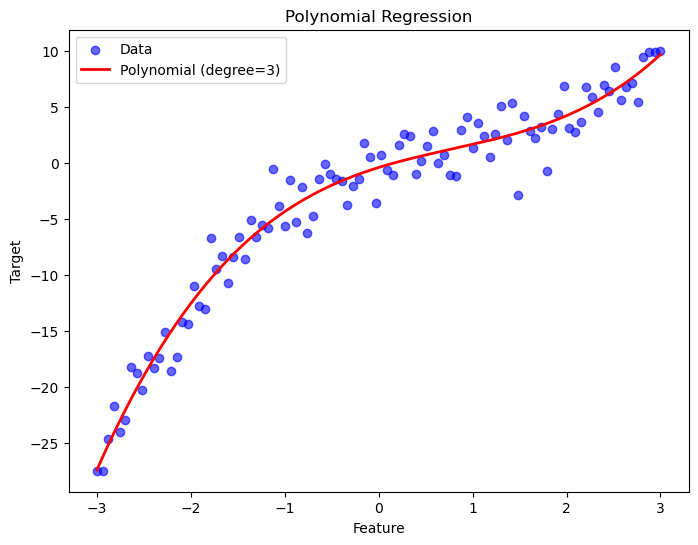


Predicted value for input 1.5: 2.73


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Create Synthetic Dataset

np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 0.5 * X**3 - X**2 + 2*X + np.random.randn(100, 1) * 2  # cubic relation + noise

# Convert to DataFrame for tabular visualization
df = pd.DataFrame(np.hstack((X, y)), columns=["Feature", "Target"])
print("=== First 5 Rows of Dataset ===")
print(df.head())

# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Polynomial Regression (Degree 3)

degree = 3
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Fit Linear Regression on transformed data
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predictions
y_pred = poly_model.predict(X_test_poly)


# Evaluation

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n=== Polynomial Regression (Degree 3) ===")
print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Visualization


# Plot dataset
plt.figure(figsize=(8,6))
plt.scatter(X, y, color="blue", alpha=0.6, label="Data")

# Plot polynomial curve
X_curve = np.linspace(-3, 3, 200).reshape(-1, 1)
X_curve_poly = poly_features.transform(X_curve)
y_curve = poly_model.predict(X_curve_poly)
plt.plot(X_curve, y_curve, color="red", linewidth=2, label=f"Polynomial (degree={degree})")

plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Polynomial Regression")
plt.legend()
plt.show()


# Predict on a New Sample

sample_value = np.array([[1.5]])  # example feature value
sample_poly = poly_features.transform(sample_value)
predicted_target = poly_model.predict(sample_poly)[0][0]

print(f"\nPredicted value for input {sample_value[0][0]}: {predicted_target:.2f}")



=== Diabetes Dataset ===
Mean Squared Error: 2900.19
R² Score: 0.45


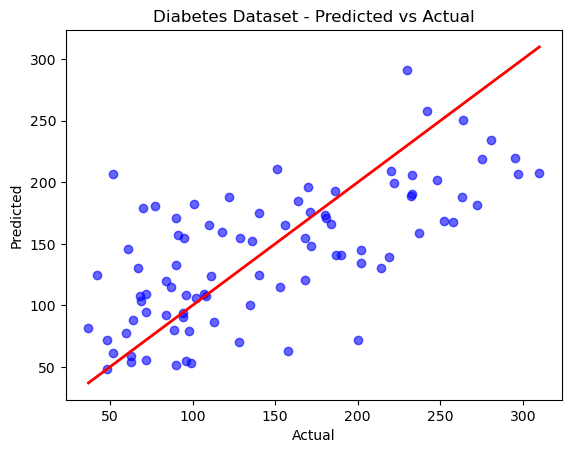


=== California Housing Dataset ===
Mean Squared Error: 0.56
R² Score: 0.58


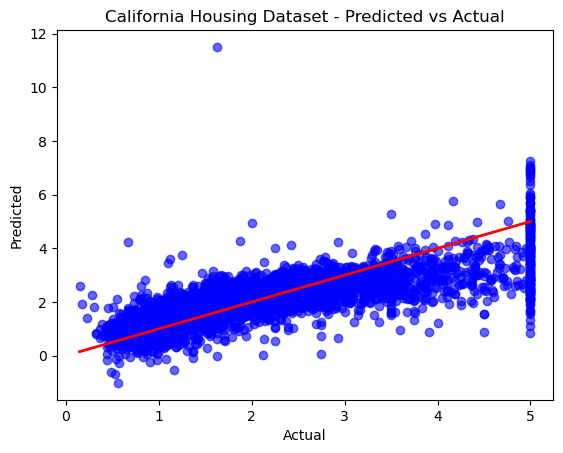


=== Wine Quality (Red) Dataset ===
Mean Squared Error: 0.39
R² Score: 0.40


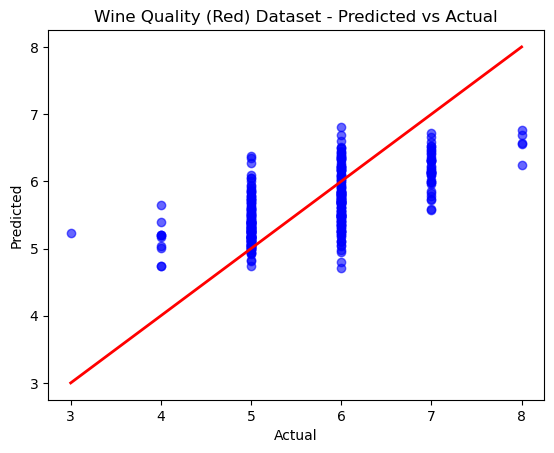

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes, fetch_california_housing, fetch_openml
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

def run_regression(X, y, dataset_name):
    """Train Linear Regression and show results"""
    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.2,
                                                        random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n=== {dataset_name} ===")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R² Score: {r2:.2f}")

    # Plot Predicted vs Actual
    plt.scatter(y_test, y_pred, alpha=0.6, color="blue")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             color="red", linewidth=2)
    plt.title(f"{dataset_name} - Predicted vs Actual")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.show()
    return model

# 1. Diabetes Dataset (local)
diabetes = load_diabetes()
run_regression(diabetes.data, diabetes.target, "Diabetes Dataset")

# 2. California Housing Dataset (download)
california = fetch_california_housing()
run_regression(california.data, california.target, "California Housing Dataset")

# 3. Wine Quality (Red) Dataset (download from OpenML)
wine = fetch_openml(name="wine-quality-red", version=1, as_frame=True)
X_wine = wine.data
y_wine = wine.target.astype(float)   # regression target (quality score)
run_regression(X_wine.values, y_wine.values, "Wine Quality (Red) Dataset")



=== Diabetes Dataset ===
Sample rows:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  Target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  

Performance:
Mean Squared Error: 2900.19
R² Score: 0.45


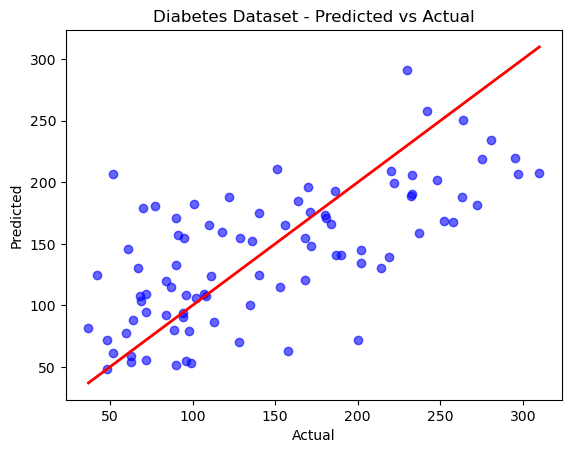

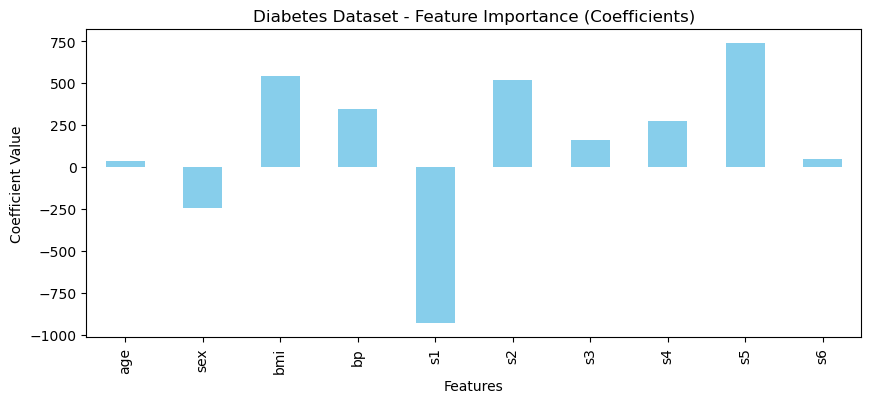


Prediction for one sample:
Actual: 219.00, Predicted: 139.55

=== California Housing Dataset ===
Sample rows:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  

Performance:
Mean Squared Error: 0.56
R² Score: 0.58


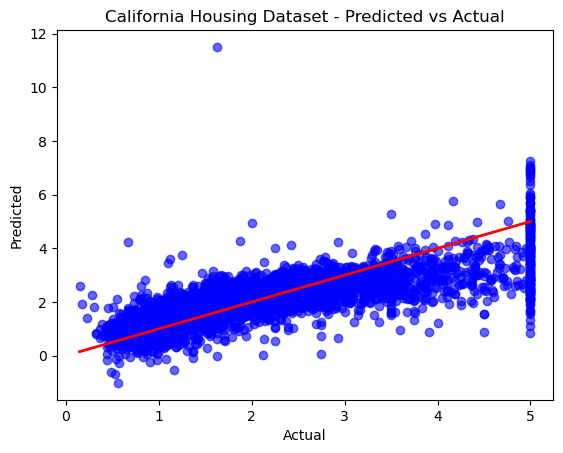

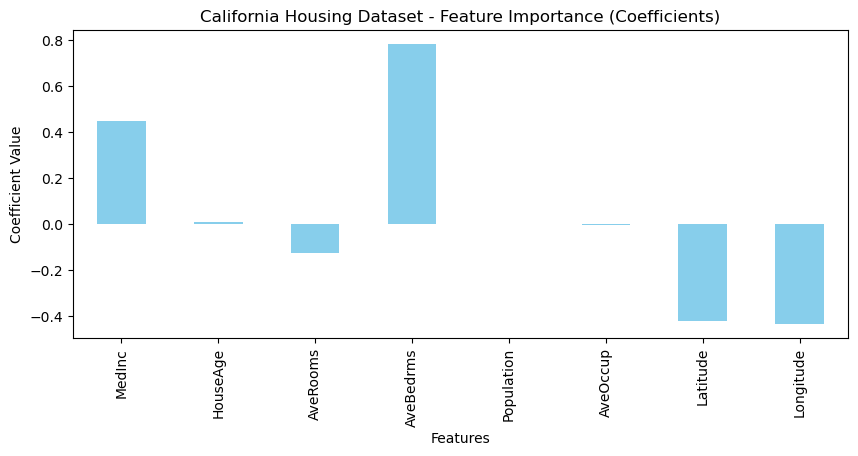


Prediction for one sample:
Actual: 0.48, Predicted: 0.72

=== Wine Quality (Red) Dataset ===
Sample rows:
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978 

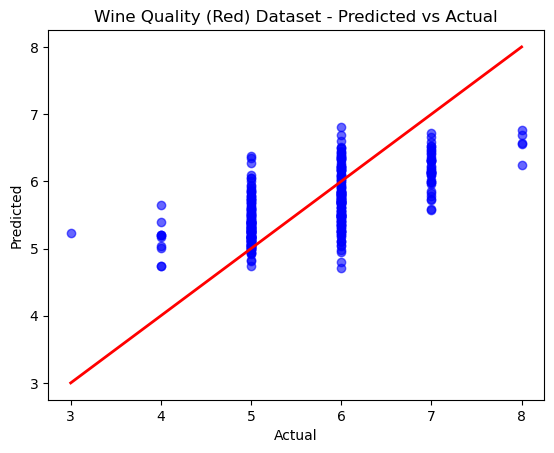

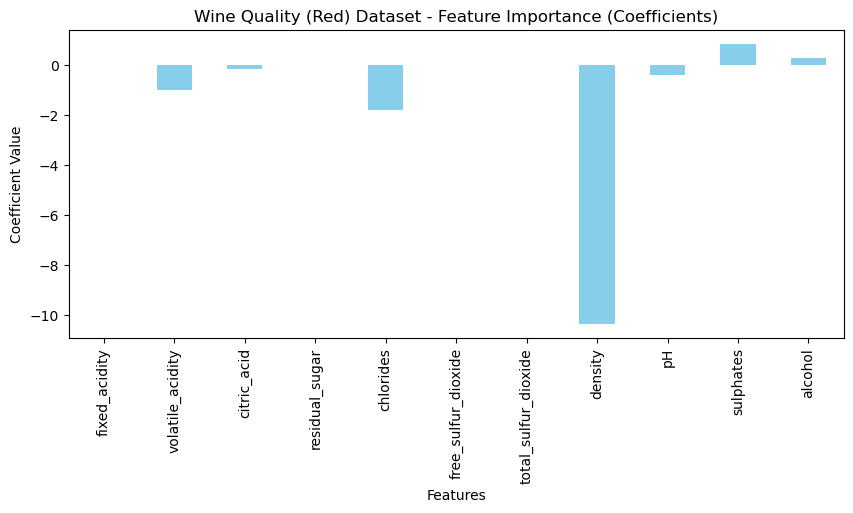


Prediction for one sample:
Actual: 6.00, Predicted: 5.35


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes, fetch_california_housing, fetch_openml
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

def run_regression(X, y, dataset_name, feature_names=None):
    """Train Linear Regression, show results, feature importance, predict one sample"""
    # Convert to DataFrame for pretty display
    df = pd.DataFrame(X, columns=feature_names if feature_names is not None else None)
    df["Target"] = y

    print(f"\n=== {dataset_name} ===")
    print("Sample rows:")
    print(df.head())   # Show first 5 rows

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.2,
                                                        random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"\nPerformance:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R² Score: {r2:.2f}")

    # Predicted vs Actual plot
    plt.scatter(y_test, y_pred, alpha=0.6, color="blue")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             color="red", linewidth=2)
    plt.title(f"{dataset_name} - Predicted vs Actual")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.show()

    # Feature importance (coefficients)
    if feature_names is not None:
        importance = pd.Series(model.coef_, index=feature_names)
        importance.plot(kind="bar", figsize=(10, 4), color="skyblue")
        plt.title(f"{dataset_name} - Feature Importance (Coefficients)")
        plt.xlabel("Features")
        plt.ylabel("Coefficient Value")
        plt.show()

    # Predict one sample (take first test row)
    sample = X_test[0].reshape(1, -1)
    actual_value = y_test[0]
    predicted_value = model.predict(sample)[0]
    print(f"\nPrediction for one sample:")
    print(f"Actual: {actual_value:.2f}, Predicted: {predicted_value:.2f}")
    return model


# 1. Diabetes Dataset (local)
diabetes = load_diabetes()
run_regression(diabetes.data, diabetes.target, "Diabetes Dataset", list(diabetes.feature_names))

# 2. California Housing Dataset (downloaded)
california = fetch_california_housing()
run_regression(california.data, california.target, "California Housing Dataset", list(california.feature_names))

# 3. Wine Quality (Red) Dataset (download from OpenML)
wine = fetch_openml(name="wine-quality-red", version=1, as_frame=True)
X_wine = wine.data
y_wine = wine.target.astype(float)
run_regression(X_wine.values, y_wine.values, "Wine Quality (Red) Dataset", list(X_wine.columns))



=== Multiple Linear Regression (Diabetes Dataset) ===
Mean Squared Error: 2900.19
R² Score: 0.45


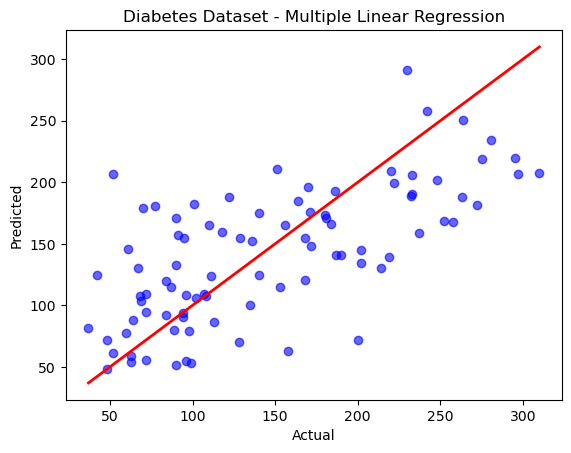


=== Polynomial Regression (Synthetic Dataset) ===
Mean Squared Error: 5.42
R² Score: 0.94


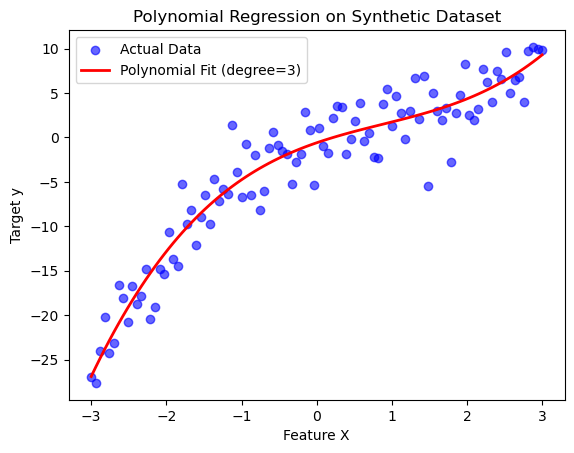

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes, make_regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# -------------------------------
# 1. MULTIPLE LINEAR REGRESSION
# -------------------------------
print("\n=== Multiple Linear Regression (Diabetes Dataset) ===")
diabetes = load_diabetes()
X = diabetes.data        # all 10 features
y = diabetes.target

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)

# Performance
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")

# Plot Predicted vs Actual
plt.scatter(y_test, y_pred, alpha=0.6, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color="red", linewidth=2)
plt.title("Diabetes Dataset - Multiple Linear Regression")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

# -------------------------------
# 2. POLYNOMIAL REGRESSION
# -------------------------------
print("\n=== Polynomial Regression (Synthetic Dataset) ===")

# Generate synthetic non-linear data
np.random.seed(42)
X_poly = np.linspace(-3, 3, 100).reshape(-1, 1)
y_poly = 0.5 * X_poly**3 - X_poly**2 + 2*X_poly + np.random.randn(100, 1) * 3
y_poly = y_poly.ravel()

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y_poly, test_size=0.2, random_state=42)

# Polynomial features (degree=3 for cubic)
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Train polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

# Performance
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_poly):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred_poly):.2f}")

# Visualization of polynomial fit
X_plot = np.linspace(-3, 3, 100).reshape(-1, 1)
X_plot_poly = poly_features.transform(X_plot)
y_plot = poly_model.predict(X_plot_poly)

plt.scatter(X_poly, y_poly, color="blue", alpha=0.6, label="Actual Data")
plt.plot(X_plot, y_plot, color="red", linewidth=2, label="Polynomial Fit (degree=3)")
plt.title("Polynomial Regression on Synthetic Dataset")
plt.xlabel("Feature X")
plt.ylabel("Target y")
plt.legend()
plt.show()
